# DS 3000 Lecture 5

### Admin:
- HW 1 grading right now and solution posted
- HW 2 due on Friday
- Quiz 1 will be posted on Friday; will have 2 hours to complete by Sunday night (covers all material up to and including today)
- New modules for today and next Tuesday: `plotly` and `requests`
    - `pip install plotly requests`

### Content:
* Plotting with `matplotlib` and `seaborn`:
    * subplots
    * scatter plots
    * line plots
        - fill_between()
        
* plotly (interactive plots)
* (if time) intro to APIs

# Line Plots

What was the mean `Marriage_rate` over time in the dataset?

- `plt.plot()` (line plot)
- line style (width, color, dot/dash)
- label & legend
- `fill_between()`

In [1]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Remember the Korean Demographics data
# we can read zipped csv files too!
# source (https://www.kaggle.com/datasets/alexandrepetit881234/korean-demographics-20002022)
import pandas as pd

df_korea = pd.read_csv('korea_demo.zip')
df_korea

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,6/1/2022,Jeollanam-do,565.0,3.80,1369.0,9.1,299.0,2.0,479.0,3.2,-805.0,-5.4
4856,6/1/2022,Sejong,248.0,7.90,106.0,3.4,43.0,1.4,123.0,3.9,141.0,4.5
4857,6/1/2022,Seoul,3137.0,4.10,3631.0,4.7,1088.0,1.4,2630.0,3.4,-494.0,-0.6
4858,6/1/2022,Ulsan,443.0,4.80,434.0,4.7,154.0,1.7,316.0,3.5,9.0,0.1


In [3]:
# can look at the unique dates in the data set
# df_korea['Date'].unique()

# unfortunately, these are strings right now, not dates
# use .to_datetime from pandas to convert a string column to a date (pay attention to format of dates)
df_korea['Date'] = pd.to_datetime(df_korea['Date'], format = '%m/%d/%Y')
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [4]:
type(df_korea.iloc[1, 0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# need to remove the Whole country observations (otherwise mean will be skewed)
bool_nocountry = df_korea['Region'] != 'Whole country'
df_korea_new = df_korea.loc[bool_nocountry, :]

# check the values of Region in the new data set to make sure Whole country is gone
df_korea_new['Region'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan'],
      dtype=object)

In [6]:
mean_marriage_by_date = df_korea_new.groupby('Date')['Marriage_rate'].mean()
mean_marriage_by_date

Date
2000-01-01    7.306250
2000-02-01    6.956250
2000-03-01    7.437500
2000-04-01    6.912500
2000-05-01    8.356250
                ...   
2022-02-01    3.870588
2022-03-01    3.447059
2022-04-01    3.658824
2022-05-01    3.805882
2022-06-01    3.452941
Name: Marriage_rate, Length: 270, dtype: float64

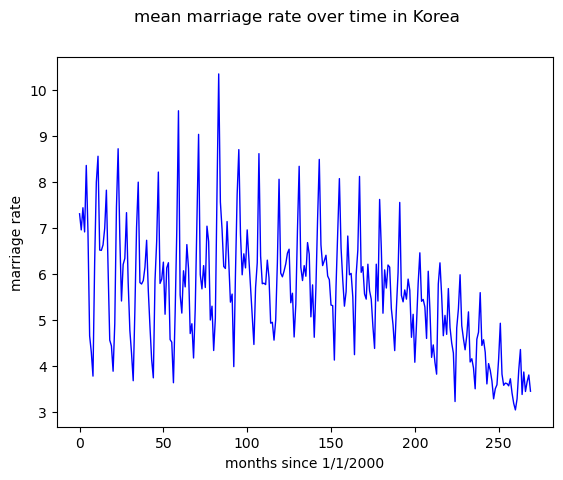

In [7]:
import matplotlib.pyplot as plt

date = range(mean_marriage_by_date.size)
plt.plot(date, mean_marriage_by_date,
        color='b', linewidth=1, linestyle='-')
plt.xlabel('months since 1/1/2000')
plt.ylabel('marriage rate')
plt.suptitle('mean marriage rate over time in Korea');

## `plt.fill_between()`

Shades between two line plots.  Great for showing how the data is distributed around its mean

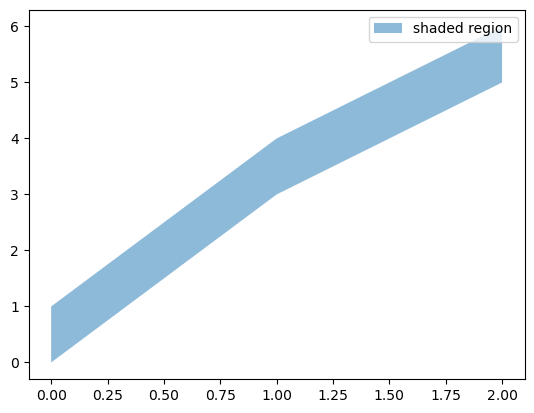

In [8]:
x = [0,1,2]
top = [1,4,6]
bottom = [0,3,5]

plt.fill_between(x, top, bottom, alpha = 0.5, label = 'shaded region')
plt.legend()

C:\Users\yangx\AppData\Local\Temp\ipykernel_18944\376977512.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.fill_between(x, regions[area], regions[area+2], alpha = 0.5,


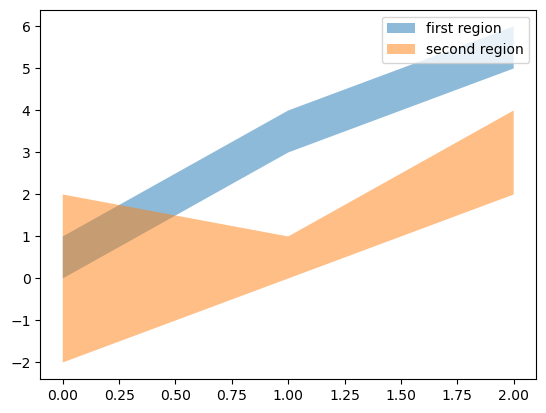

In [9]:
x = [0,1,2]
regions = pd.Series({'top1': [1,4,6],
                     'top2': [2,1,4], 
                    'btm1': [0,3,5], 
                    'btm2': [-2, 0, 2]})
labels = ['first region', 'second region']

for area in range(2): 
    plt.fill_between(x, regions[area], regions[area+2], alpha = 0.5, 
                    label = labels[area])
plt.legend()    
plt.show()    

### Exercise 1: 

Download the `pokedata.csv` file from the Homeworks Module in Canvas and make sure it is stored in the same directory as this `lecture5.ipynb` lecture file. Take about 10 minutes and make **one** plot that demonstrates the answer to some question(s) you might be interested in concerning the original 151 Pokémon. If you are struggling to come up with a question, below are some *suggestions*. When you are done, share your findings with your neighbor(s), making sure to explain what the plot you made means/how it helps answer your question.

Some possible questions to address with your plot(s):
- How does Pokémon height differ across types?
- Do Pokémon with higher Pokédex values generally have better (higher) damage?
- What is the relationship between a Pokémon's weight and their speed?

**Note:** you may wish to look at the `lecture4.ipynb` for inspiration.

In [10]:
poke_df = pd.read_csv('pokedata.csv')
poke_df.head()

,Pokedex,Pokemon,MainType,SecondaryType,Height,Weight,Damage,BaseSpeed,Attack,Defense
0,1,Bulbasaur,Grass,Poison,24,25.2,45,45,49,49
1,2,Ivysaur,Grass,Poison,39,28.7,60,60,62,63
2,3,Venusaur,Grass,Poison,79,220.5,80,80,82,83
3,4,Charmander,Fire,NaN,24,18.7,39,65,52,43
4,5,Charmeleon,Fire,NaN,43,41.9,58,80,64,58


Text(0.5, 0.98, 'Damage and Defense by type')

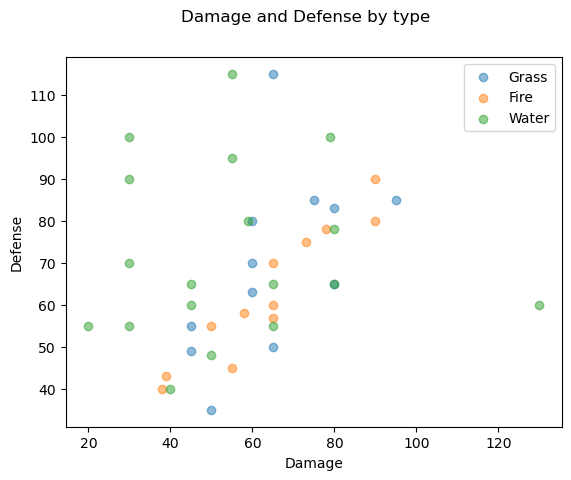

In [13]:
#Only the first three types for the data visualization
ptypes = poke_df['MainType'].unique()[0:3]

# make a plot between damage and defense for the three types
for ptype in ptypes: 
    bool_type = poke_df['MainType'] == ptype
    df_type = poke_df.loc[bool_type,:]

    plt.scatter(df_type['Damage'], df_type['Defense'], alpha = 0.5, label = ptype)

plt.legend()
plt.xlabel('Damage')
plt.ylabel('Defense')
plt.suptitle('Damage and Defense by type')

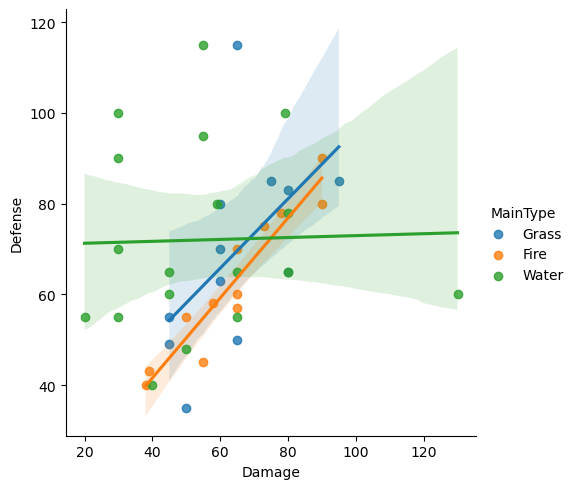

In [16]:
# after class practice: only take part of the type (maybe 3) and make the plot
#lmplot
import seaborn as sns

pokesub_bool = poke_df['MainType'].isin(ptypes)
pokesub_df = poke_df.loc[pokesub_bool,:]

g2 = sns.lmplot(data = pokesub_df, x = 'Damage', y = 'Defense', hue = 'MainType')

g2.set_axis_labels('Damage', 'Defense')

## Tip: Shop around for just the right graph

Seaborn has some more niche graphs which are fantastic for specific applications.  While we won't cover the syntax on each of these, you'll find they're similar to what we've already covered.

Take a few minutes outside of class to browse these graphs to see whats out there:

[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

When you are trying to making a plot, we assume it is a 2D plot. 
Means your plot contains 1/2 variables. 

Variable type: numerical and categorical 
- One numerical: historgram/density plot/boxplot
- One categorical: bar plot
- Two numerical: scatter plot
- One numerical and one categorical: side-by-side boxplot
- Two categorical: side-by-side (stack) bar plot

C:\Users\yangx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yangx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yangx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yangx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

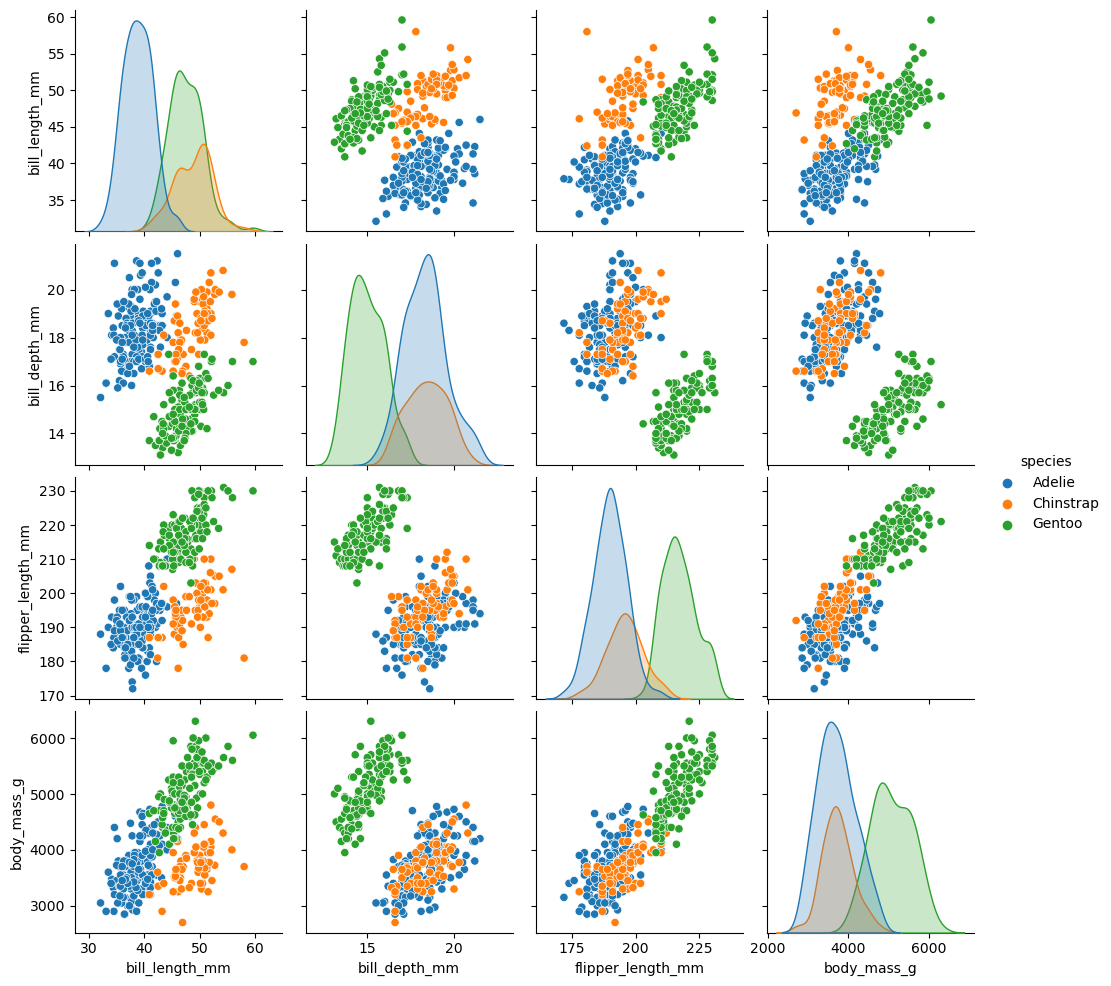

In [17]:
df_penguin = sns.load_dataset('penguins')

sns.pairplot(df_penguin, hue='species')

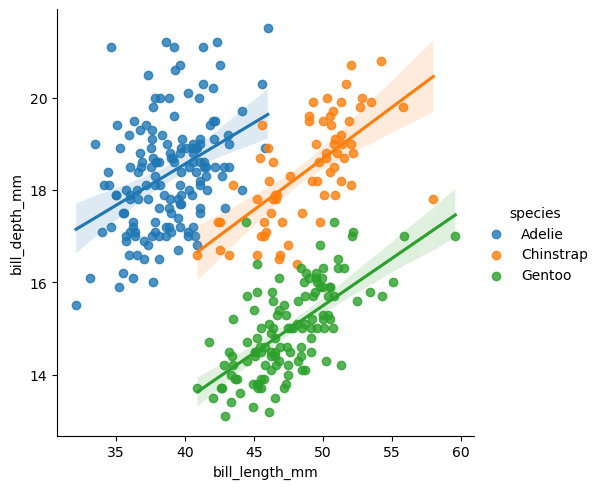

In [18]:
sns.lmplot(data = df_penguin, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

# Plotly
* Interactive visualization library
* https://plot.ly/python/ (https://plot.ly/python/getting-started/)
* Plotly is a big library, plotly express is a simplified interface
* Plotly uses different syntax as matplotlib / seaborn :(!

### Plotly scatter plots
- `hover_data`
- `color`
- `symbol`
- `size`

In [21]:
# seaborn has some default data sets (like the penguins one)
df_titanic = sns.load_dataset('titanic')
df_titanic

df_titanic = df_titanic.dropna()
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


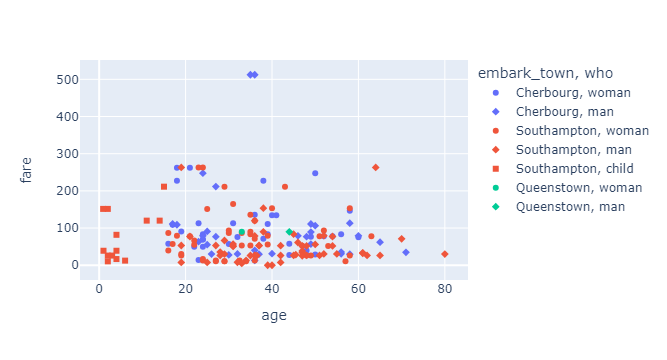

In [25]:
# make a scatter plot between age and fare
import plotly.express as px

px.scatter(data_frame = df_titanic, x = 'age', y = 'fare', color = 'embark_town', 
           symbol = 'who', hover_data = ['pclass', 'alive'])

## Korean Demographics Data

In [27]:
df_korea_nomiss = df_korea.dropna(axis = 0, how = 'any')
df_korea_nomiss.head()
df_korea_nomiss.shape

(4709, 12)

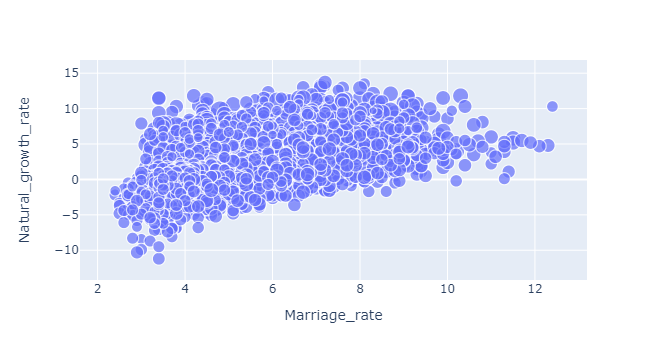

In [28]:
# make a scatter plot between marriage rate and natural growth rate, 
# use the divorce rate as the size and show the information about Region
px.scatter(df_korea_nomiss, x = 'Marriage_rate', y = 'Natural_growth_rate', 
          size = 'Divorce_rate', hover_data = ['Region', 'Date'])

## The Get to Know You Data

In [32]:
# read the file into the python, remove some missing values
gtky = pd.read_csv('cleaner_gtky.csv', index_col = 'fake_student_id')
gtky_nomiss = gtky.dropna(axis = 0, subset = ['ideal_start_salary_thousands'])
gtky.head()

,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
fake_student_id,,,,,,,,,,
1380,9/9/2022 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
3926,9/9/2022 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2394,9/9/2022 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
4827,9/9/2022 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
9977,9/9/2022 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0


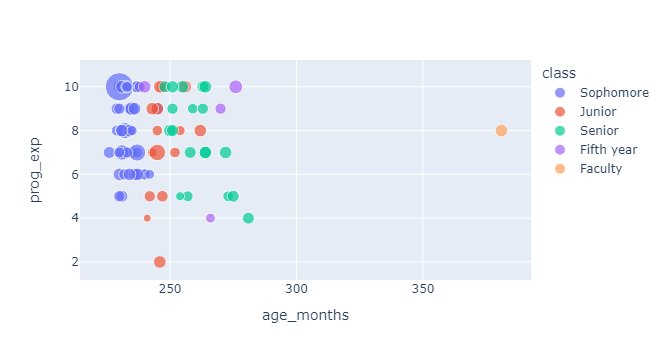

In [38]:
# make a scatter plot between pro_exp, age. Use class for different class
fig = px.scatter(data_frame = gtky_nomiss, x = 'age_months', y = 'prog_exp', 
           size = "ideal_start_salary_thousands", color = 'class', 
           hover_data = ['co_op'])
fig.show()

## Saving a Plotly Figure
* html is a great format to share your *interactive* plot

In [39]:
import plotly
plotly.offline.plot(fig, filename = 'class_data.html')

'class_data.html'

## Plotly does line plots too

- color

In [40]:
df = pd.DataFrame({
    'x': [1,2,3,4,5,6],
    'y': [2,3,4,7,10,24],
    'grp': [0,1,0,1,0,1]
})
df

,x,y,grp
0,1,2,0
1,2,3,1
2,3,4,0
3,4,7,1
4,5,10,0
5,6,24,1


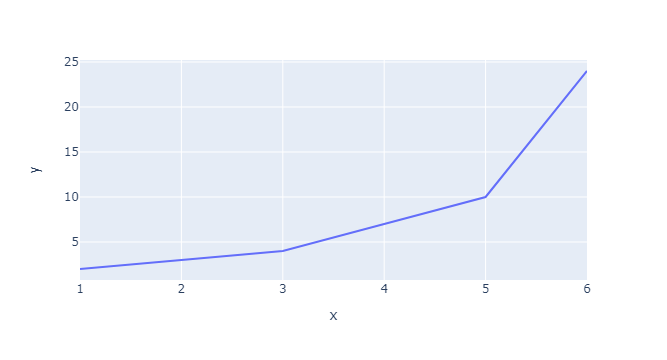

In [41]:
px.line(data_frame = df, x = 'x', y = 'y')

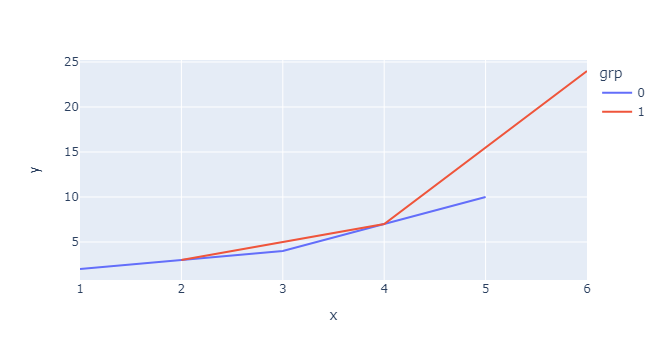

In [43]:
px.line(data_frame = df, x = 'x', y = 'y', color = 'grp')

# Timestamps

Many datasets include a timestamp, or include a date/time as a feature in the dataset. Understanding how to deal with these is important! We actually already used pandas `.to_datetime()` function with the Korean Demographics data to cast strings to `datetime` objects. 

## Unix Time

- [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) Coordinated Universal Time
    - time zone at 0 deg longitude
        - how is 0 deg longitude defined?  
            - A succesfully warring empire (United Kingdom) chose it 
                - (It would be convenient if a metric system loving empire had been more successful at war ...)
- [Unix Time](https://en.wikipedia.org/wiki/Unix_time) is The number of seconds which have passed since 00:00:00 UTC on 1 Jan 1970 (ignoring leap seconds)
- UTC is time zone agnostic 
    - (more on this next lesson...)

## Python's `datetime` & `timedelta`
- helpful for all those pesky unit conversions

In [46]:
from datetime import datetime, timedelta

# would you believe that the below is exactly 2 am on Valentine's Day 2021?
utc_example = 1613286000

dt0 = datetime.fromtimestamp(utc_example)
dt0

datetime.datetime(2021, 2, 14, 2, 0)

In [50]:
datetime.now()

datetime.datetime(2024, 7, 10, 12, 29, 41, 183188)

In [52]:
dt2 = datetime(year = 2031, month = 4, day = 15, hour = 9, minute = 26, second = 13)
dt2

datetime.datetime(2031, 4, 15, 9, 26, 13)

In [54]:
dt2.month, dt2.day

(4, 15)

In [55]:
offset = timedelta(days = 5, seconds = 4236)
print(dt2)
print(dt2 + offset)

2031-04-15 09:26:13
2031-04-20 10:36:49


In [56]:
time = 'the time is now: September-30-2022 3:20'
datetime.strptime(time, 'the time is now: %B-%d-%Y %H:%M')

datetime.datetime(2022, 9, 30, 3, 20)

In [61]:
s = datetime.now().strftime('The time is now: %B-%d-%Y %H:%M %p')
s

'The time is now: July-10-2024 12:39 PM'

In [64]:
xiaoyi_age = datetime.now() - datetime(year = 1993, month = 8, day = 3, hour = 10, minute = 55)
xiaoyi_age = xiaoyi_age.total_seconds()
xiaoyi_age

976239999.6345

### Exercise 2: 

A logarithmic birthday party is the moment you are some integer power of 10 seconds old (1 second old, 10 seconds old, 100 seconds old, ...)

Compute your first 10 logarithmic birthday parties, store them in a dataframe as shown below.  (You're welcome to use a fake birthday if you'd like)

|  log_bday |   year |  month |  day |   hour | minute|sec |
|----------:|-------:|-------:|-----:|-------:|------:|---:|
|  10^0 sec | 1990   |  12    |  20  |   10   |   42  |  1 |
|  10^1 sec | 1990   |  12    |  20  |   10   |   42  | 10 |
|  10^2 sec | 1990   |  12    |  20  |   10   |   43  | 40 |
|  10^3 sec | 1990   |  12    |  20  |   10   |   58  | 40 |
|  10^4 sec | 1990   |  12    |  20  |   13   |   28  | 40 |
|  10^5 sec | 1990   |  12    |  21  |   14   |   28  | 40 |
|  10^6 sec | 1991   |   1    |   1  |    0   |   28  | 40 |
|  10^7 sec | 1991   |   4    |  15  |    4   |   28  | 40 |
|  10^8 sec | 1994   |   2    |  19  |   20   |   28  | 40 |
|  10^9 sec | 2022   |   8    |  28  |   12   |   28  | 40 |
| 10^10 sec | 2307   |  11    |  10  |    4   |   28  | 40 |

(++) add a column with a more easily readable time (e.g. `August-28-2022 12:28 PM`)

In [106]:
birth_date = datetime(year = 1993, month = 8, day = 3, hour = 10, minute = 55)

for exp in range(11): 
    
    offset = timedelta(seconds = (10 ** exp))
    bday = birth_date + offset
    string_bday = bday.strftime('%B-%d-%Y %H:%M %p')
    print(string_bday)

August-03-1993 10:55 AM
August-03-1993 10:55 AM
August-03-1993 10:56 AM
August-03-1993 11:11 AM
August-03-1993 13:41 PM
August-04-1993 14:41 PM
August-15-1993 00:41 AM
November-27-1993 04:41 AM
October-03-1996 20:41 PM
April-11-2025 12:41 PM
June-24-2310 04:41 AM


In [113]:
birth_date = datetime(year = 1993, month = 8, day = 3, hour = 10, minute = 55)

df_log_birth = pd.Series({'bday': '0 second', 
                          'year': birth_date.year,
                          'month': birth_date.month,
                          'day': birth_date.day,
                          'hour': birth_date.hour, 
                          'minute': birth_date.minute,
                          'second': birth_date.second,
                          'read_day': birth_date.strftime('%B-%d-%Y %H:%M %p')
    
})

In [114]:
df_log_birth = pd.DataFrame(df_log_birth).transpose()

In [115]:
for exp in range(1, 11):
    offset = timedelta(seconds = (10 ** exp))
    bday = birth_date + offset

    s_bday = pd.Series({'bday': f'10^{exp} seconds', 
                          'year': bday.year,
                          'month': bday.month,
                          'day': bday.day,
                          'hour': bday.hour, 
                          'minute': bday.minute,
                          'second': bday.second,
                          'read_day': bday.strftime('%B-%d-%Y %H:%M %p')})
    
    df_log_birth = pd.concat([df_log_birth, s_bday.to_frame().T], axis = 0)
    #df_log_birth.loc[str(bday),:] = s_bday

df_log_birth

,bday,year,month,day,hour,minute,second,read_day
0,0 second,1993,8,3,10,55,0,August-03-1993 10:55 AM
0,10^1 seconds,1993,8,3,10,55,10,August-03-1993 10:55 AM
0,10^2 seconds,1993,8,3,10,56,40,August-03-1993 10:56 AM
0,10^3 seconds,1993,8,3,11,11,40,August-03-1993 11:11 AM
0,10^4 seconds,1993,8,3,13,41,40,August-03-1993 13:41 PM
0,10^5 seconds,1993,8,4,14,41,40,August-04-1993 14:41 PM
0,10^6 seconds,1993,8,15,0,41,40,August-15-1993 00:41 AM
0,10^7 seconds,1993,11,27,4,41,40,November-27-1993 04:41 AM
0,10^8 seconds,1996,10,3,20,41,40,October-03-1996 20:41 PM
0,10^9 seconds,2025,4,11,12,41,40,April-11-2025 12:41 PM


## Timezone

In [93]:
import pytz
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [95]:
new_year = datetime(year = 2024, month = 1, day = 1)
time_zone_gmt = pytz.timezone("GMT")
new_year_gmt = time_zone_gmt.localize(new_year)
new_year_gmt

datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<StaticTzInfo 'GMT'>)

In [96]:
time_zone_est = pytz.timezone("US/Eastern")
new_year_est = time_zone_est.localize(new_year)
new_year_est

datetime.datetime(2024, 1, 1, 0, 0, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>)

In [97]:
new_year_est - new_year_gmt

datetime.timedelta(seconds=18000)

In [99]:
time_zone_est = pytz.timezone("US/Eastern")
new_year_bug = datetime(year = 2024, month = 1, day = 1, tzinfo = time_zone_est)
new_year_bug - new_year_gmt

datetime.timedelta(seconds=17760)

In [105]:
#time_zone_gmt.localize(new_year_est)

In [104]:
new_year_est
new_zone = new_year_est.astimezone(time_zone_gmt)
new_zone

datetime.datetime(2024, 1, 1, 5, 0, tzinfo=<StaticTzInfo 'GMT'>)